In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

train_data_dir = '/content/drive/MyDrive/acneg'
validation_data_dir = '/content/drive/MyDrive/validation folder'
batch_size = 32
num_epochs = 10

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

model.save('acne_classification_model.h5')


Found 132 images belonging to 4 classes.
Found 31 images belonging to 4 classes.
Epoch 1/10
4/4 [==============================] - 35s 9s/step - loss: 3.7275 - accuracy: 0.2700
Epoch 2/10
4/4 [==============================] - 34s 8s/step - loss: 2.1916 - accuracy: 0.3047
Epoch 3/10
4/4 [==============================] - 34s 8s/step - loss: 1.1241 - accuracy: 0.5938
Epoch 4/10
4/4 [==============================] - 28s 6s/step - loss: 0.9669 - accuracy: 0.6100
Epoch 5/10
4/4 [==============================] - 29s 9s/step - loss: 1.1241 - accuracy: 0.6000
Epoch 6/10
4/4 [==============================] - 27s 6s/step - loss: 0.8413 - accuracy: 0.7200
Epoch 7/10
4/4 [==============================] - 27s 6s/step - loss: 0.8214 - accuracy: 0.6800
Epoch 8/10
4/4 [==============================] - 33s 7s/step - loss: 0.6795 - accuracy: 0.7031
Epoch 9/10
4/4 [==============================] - 27s 6s/step - loss: 0.7154 - accuracy: 0.7200
Epoch 10/10
4/4 [==============================] - 27s 

In [ ]:
from tensorflow.keras.layers import Dropout

num_classes = 4


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_data_dir = '/content/drive/MyDrive/test folder'

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy}")


Found 10 images belonging to 4 classes.
1/1 [==============================] - 5s 5s/step - loss: 1.1470 - accuracy: 0.6000
Test Accuracy: 0.6000000238418579


In [ ]:
import pickle

with open('model_objects.pkl', 'wb') as model_objects_file:
    model_objects = {
        'train_datagen': train_datagen,
        'batch_size': batch_size,
        'num_epochs': num_epochs,
    }
    pickle.dump(model_objects, model_objects_file)


1/1 [==============================] - 2s 2s/step


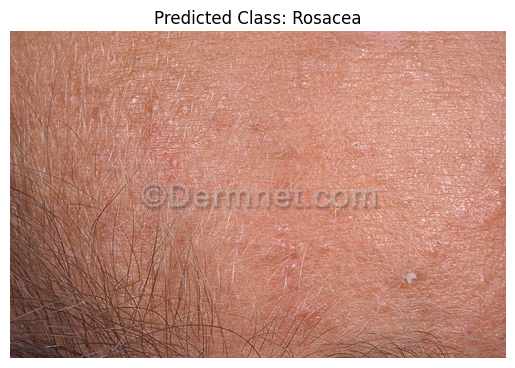

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import drive


model = load_model('/content/acne_classification_model.h5')

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(299, 299))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    return img

image_path = '/content/drive/MyDrive/test folder/acne-closed/acne-closed-comedo-26.jpg'

if os.path.exists(image_path):
    processed_img = preprocess_image(image_path)

    class_labels = ["cyst", "closed acne", "perimetial dermititis", "Rosacea"]
    prediction = model.predict(processed_img)
    predicted_class = class_labels[np.argmax(prediction)]

    plt.imshow(image.load_img(image_path))
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis('off')
    plt.show()
else:
    print("Image file not found. Please check the path.")
